In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os, sys

results_path = "/hpc/home/mk423/Anxiety/FullDataWork/Validations/MultiTask/n_nets/"

In [2]:
files = [file for file in os.listdir(results_path) if file.split('.')[-1] == "pkl"]

flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_mse_list = []
epm_mse_list = []
oft_mse_list = []

n_net_list = []

for file in files:
    perf_dict = pickle.load(open(results_path+file,"rb"))
    
    flx_auc_list.append(np.mean([perf_dict["flx_auc"][key] for key in perf_dict["flx_auc"].keys()]))
    epm_auc_list.append(np.mean([perf_dict["epm_auc"][key] for key in perf_dict["epm_auc"].keys()]))
    oft_auc_list.append(np.mean([perf_dict["oft_auc"][key] for key in perf_dict["oft_auc"].keys()]))
    
    flx_mse_list.append(perf_dict["flx_mse"])
    oft_mse_list.append(perf_dict["oft_mse"])
    epm_mse_list.append(perf_dict["epm_mse"])

    n_net_list.append(perf_dict["n_nets"])
    
flx_auc_list = np.array(flx_auc_list)
epm_auc_list = np.array(epm_auc_list)
oft_auc_list = np.array(oft_auc_list)

flx_mse_list = np.array(flx_mse_list)
epm_mse_list = np.array(epm_mse_list)
oft_mse_list = np.array(oft_mse_list)

n_net_list = np.array(n_net_list)

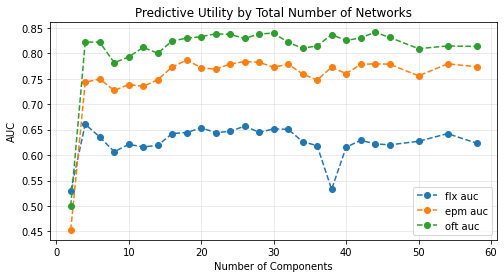

In [3]:
idxs = np.argsort(n_net_list)

plt.figure(figsize=(8,4))
plt.plot(n_net_list[idxs],flx_auc_list[idxs],"--o",label="flx auc")
plt.plot(n_net_list[idxs],epm_auc_list[idxs],"--o",label="epm auc")
plt.plot(n_net_list[idxs],oft_auc_list[idxs],"--o",label="oft auc")
plt.grid(alpha=.3)
plt.legend()
plt.title("Predictive Utility by Total Number of Networks")
plt.xlabel("Number of Components")
plt.ylabel("AUC")
#plt.savefig("/hpc/home/mk423/Anxiety/FullDataWork/Figures/n_nets/n_net_predict.svg")
plt.show()

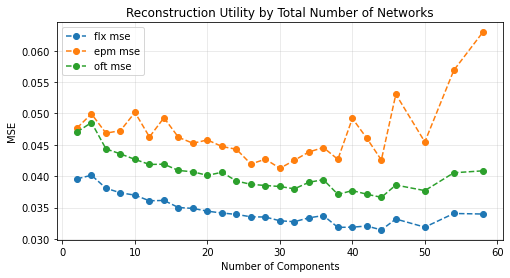

In [4]:
plt.figure(figsize=(8,4))
plt.plot(n_net_list[idxs],flx_mse_list[idxs],"--o",label="flx mse")
plt.plot(n_net_list[idxs],epm_mse_list[idxs],"--o",label="epm mse")
plt.plot(n_net_list[idxs],oft_mse_list[idxs],"--o",label="oft mse")
plt.legend()
plt.grid(alpha=.3)
plt.title("Reconstruction Utility by Total Number of Networks")
plt.xlabel("Number of Components")
plt.ylabel("MSE")
#plt.savefig("/hpc/home/mk423/Anxiety/FullDataWork/Figures/n_nets/n_net_reconstruct.svg")

plt.show()

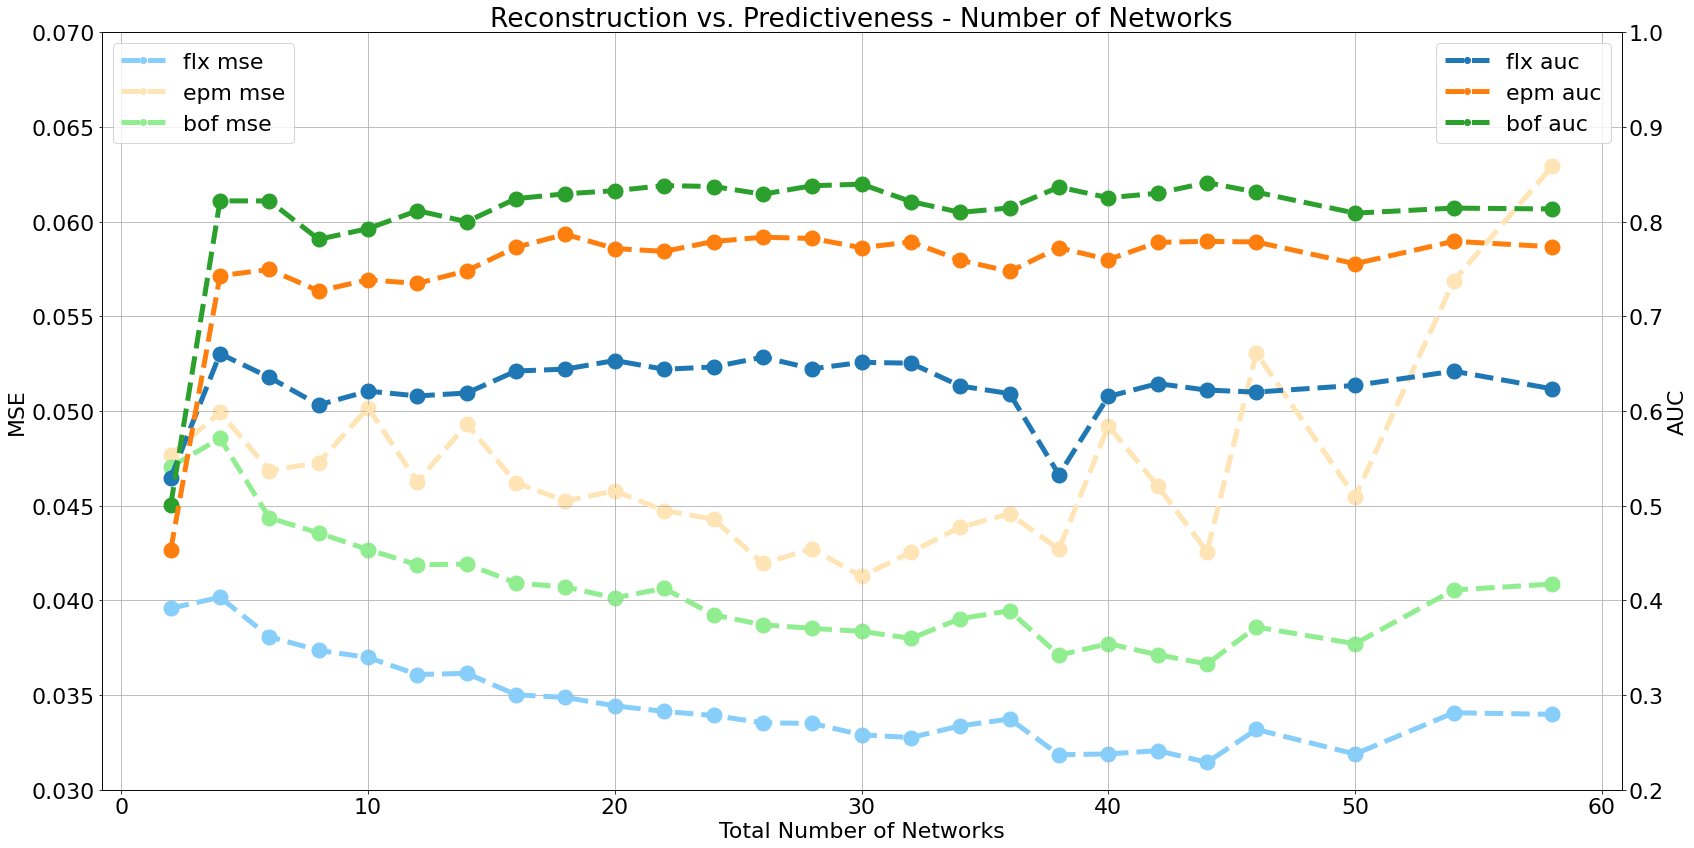

In [34]:
idxs = np.argsort(n_net_list)

x = n_net_list[idxs]

y1_flx = flx_mse_list[idxs]
y1_epm = epm_mse_list[idxs]
y1_oft = oft_mse_list[idxs]

y2_flx = flx_auc_list[idxs]
y2_epm = epm_auc_list[idxs]
y2_oft = oft_auc_list[idxs]

linewidth=5
scatterLw=10

fig, ax1 = plt.subplots()
fig.set_size_inches(24,12)
plt.rcParams.update({'font.size':22})
plt.grid()
ax1color="black"
ax1.set_xlabel("Total Number of Networks")
ax1.set_ylabel("MSE",color=ax1color)

ax1.plot(x,y1_flx,"--o",color="lightskyblue",label="flx mse",linewidth=linewidth)
ax1.plot(x,y1_epm,"--o",color="moccasin",label="epm mse",linewidth=linewidth)
ax1.plot(x,y1_oft,"--o",color="lightgreen",label="bof mse",linewidth=linewidth)

ax1.scatter(x,y1_flx,color="lightskyblue",linewidth=scatterLw)
ax1.scatter(x,y1_epm,color="moccasin",linewidth=scatterLw)
ax1.scatter(x,y1_oft,color="lightgreen",linewidth=scatterLw)

ax1.tick_params(axis="y",labelcolor=ax1color)
ax1.set_ylim([0.03,0.07])
ax2 = ax1.twinx()
ax2color="black"
ax2.set_ylabel("AUC",color=ax2color)

ax2.plot(x,y2_flx,"--o",label="flx auc",linewidth=linewidth)
ax2.plot(x,y2_epm,"--o",label="epm auc",linewidth=linewidth)
ax2.plot(x,y2_oft,"--o",label="bof auc",linewidth=linewidth)

ax2.scatter(x,y2_flx,linewidth=scatterLw)
ax2.scatter(x,y2_epm,linewidth=scatterLw)
ax2.scatter(x,y2_oft,linewidth=scatterLw)

ax2.tick_params(axis='y',labelcolor=ax2color)
ax2.set_ylim([0.2,1.0])
fig.tight_layout()

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Reconstruction vs. Predictiveness - Number of Networks")
plt.show()

In [12]:
files = [file for file in os.listdir(results_path) if file.split('.')[-1] == "pkl"]

flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_mse_list = []
epm_mse_list = []
oft_mse_list = []

n_net_list = []

for file in files:
    perf_dict = pickle.load(open(results_path+file,"rb"))
    
    flx_auc_list.append(np.mean([perf_dict["flx_auc"][key] for key in perf_dict["flx_auc"].keys()]))
    epm_auc_list.append(np.mean([perf_dict["epm_auc"][key] for key in perf_dict["epm_auc"].keys()]))
    oft_auc_list.append(np.mean([perf_dict["oft_auc"][key] for key in perf_dict["oft_auc"].keys()]))
    
    flx_mse_list.append(perf_dict["flx_mse"])
    oft_mse_list.append(perf_dict["oft_mse"])
    epm_mse_list.append(perf_dict["epm_mse"])

    n_net_list.append(perf_dict["n_nets"])
    
flx_auc_list = np.array(flx_auc_list)
epm_auc_list = np.array(epm_auc_list)
oft_auc_list = np.array(oft_auc_list)

flx_mse_list = np.array(flx_mse_list)
epm_mse_list = np.array(epm_mse_list)
oft_mse_list = np.array(oft_mse_list)

n_net_list = np.array(n_net_list)

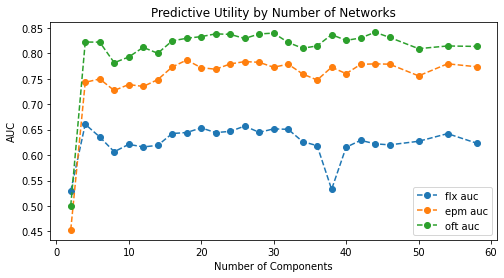

In [13]:
idxs = np.argsort(n_net_list)

plt.figure(figsize=(8,4))
plt.plot(n_net_list[idxs],flx_auc_list[idxs],"--o",label="flx auc")
plt.plot(n_net_list[idxs],epm_auc_list[idxs],"--o",label="epm auc")
plt.plot(n_net_list[idxs],oft_auc_list[idxs],"--o",label="oft auc")
plt.legend()
plt.title("Predictive Utility by Number of Networks")
plt.xlabel("Number of Components")
plt.ylabel("AUC")
plt.show()

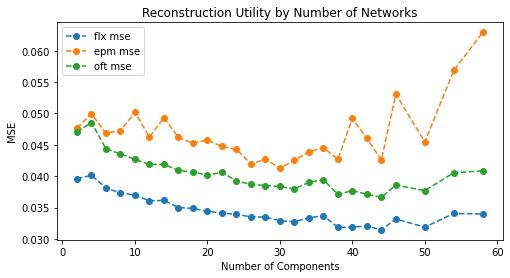

In [14]:
plt.figure(figsize=(8,4))
plt.plot(n_net_list[idxs],flx_mse_list[idxs],"--o",label="flx mse")
plt.plot(n_net_list[idxs],epm_mse_list[idxs],"--o",label="epm mse")
plt.plot(n_net_list[idxs],oft_mse_list[idxs],"--o",label="oft mse")
plt.legend()
plt.title("Reconstruction Utility by Number of Networks")
plt.xlabel("Number of Components")
plt.ylabel("MSE")
plt.show()